##### AIND 2018 Term 1  Carl Wennstam



# Planning Project Report


- [Introduction](#introduction)
 - [State space](#state_space)
 - [Step cost](#step_cost)
 - [Search Algorithms](#search_algos)
 - [Heuristics](#heuristics)
- [Solutions](#solutions)
 - [Uninformed](#uninformed_solutions)
 - [Informed](#informed_solutions)
- [Complexity](#complexity)
 - [Uninformed](#informed_complexity)
 - [Informed](#informed_complexity)
- [Appendix](#appendix)






In [83]:
import pandas as pd
pd.options.display.float_format = '{:0.1f}'.format

import utils
from importlib import reload
reload(utils)

#enable multi-variable printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

uninformed=[]
informed=[]
for p in range(1,4):
    u=dict()
    u['performance'],u['solution']=utils.load_results('uninformed',p)
    uninformed.append(u)

    i=dict()
    i['performance'],i['solution']=utils.load_results('informed',p)
    informed.append(i)

<module 'utils' from 'c:\\Users\\Administrator\\Documents\\GitHub\\AIND-Planning\\utils.py'>

<a id='introduction'></a>
## Introduction

<a id='state_space'></a>
### State space

**Problem 1** has a total off 10 initial fluent states, for a state space of $2^{10} = 1,024$.
The goal state contains only 2 fluents, meaning the others are Don't Care.

![title](p1/images/p1.svg)

Problems 2 and 3 are gradually larger, with state spaces of $2^{15} = 32,768$ and $2^{16} = 65,536$ respectively.
<a id='step_cost'></a>
### Step cost

A **solution** to a **planning problem** is a sequence of actions that leads from the initial state to the goal state.

An **optimal** solution is the solution with the **lowest path cost**, or

$$ S_{optimal} \equiv \arg \min_{S} \left( pathcost(S) \right) = \arg \min_{S} \left( length(S) \right) $$ 

, since we are assuming **unit step cost**. 

Solutions that are not optimal are sometimes referred to as **satisficing.**

<a id='search_algos'></a>
### Search algorithms

Five uninformed search algorithms were tested.

* **Breadth First Search (BFS)** expands the frontier. With a zero step cost like in this exercise, this will yeal the shortest path and optimal solution.

* **Uniform Cost Search (UCS)** stays optimal also for non-zero step costs. On the other hand, with unit step cost it will lag **BFS** by one expansion.  

* **Breadth First Tree Search (BFTS)**

* **Depth First Graph Search (DFGS)** is non-optimal since, as it will choose the longest path first it is *guaranteed* to return a longer solution when such a solution exists.

* **Depth Limited Search (DLS)* 

We also have three informed algorithms.

* **Greedy Best First Graph Search (GBFGS)**

* **A-Star (A*)** fixes problems with **Greedy Best First** by supplementing the heuristic $h(n)$, which can be thought of as the expected future cost, with $g(n)$, the path cost seen so far.

* **Recursive Best First Search (RBFS)**

<a id='heuristics'></a>
### Heuristics

* **H1** is not a true heuristic as it always returns ?.

* **Level sum (HPL)** returns  not a true heuristic as it always returns ?.

* **Ignore Preconditions (HIP)** is not a true heuristic as it always returns ?.

<a id='solution_quality'></a>
## Solution quality
<a id='solutions_uninformed'></a>
### Uninformed (blind) search
#### Problem 1
For Problem 1, all  **uninformed** search algorithms were able to find a solution.

In [79]:
#reload(utils)
df=uninformed[0]['performance'].sort_values(by=['length','expansions'])
p1_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p1_summary

length  optimal
problem algorithm                 algo                 
1       Breadth First Search      BFS        6     True
        Uniform Cost Search       UCS        6     True
        Breadth First Tree Search BFTS       6     True
        Depth First Graph Search  DFGS      20    False
        Depth Limited Search      DLS       50    False

* **BFS** found a solution of path cost = 6, which is an optimal solution. (Again, we know this since we know that **BFS** *always* yields an optimal solution.) 

* Apart from **BFS**, we also found optimal solutions with **UCS** and **Breadth First Tree Search (BFTS)**, whereas **Depth First Graph Search (DFGS)** and **Depth Limited Search (DFS)** returned suboptimal solutions, having path cost > 6 as expected. 

Below are the action sequences of the optimal solutions. 

In [63]:
df=uninformed[0]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,BFS,BFTS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Load(C2, P2, JFK)","Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)"
3,"Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)"
4,"Fly(P1, SFO, JFK)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"
5,"Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"


The **BFS/BFTS** solution is depicted graphically below, implemented in dot language.  

* *Load(P,C,A)* actions are shown as clockwise loop on A ending in a filled diamond.

* *Unload(P,C,A)* actions are shown as counter-clockwise loop on A ending in an unfilled diamond.

![title](p1/images/breadth_first.svg)

THe **UCS** solution is also optimal, with the same length but differing in the order of the actions: it flies both planes and then unloads both cargoes in parallel, whereas **BFS/BFTS** chose to finish one Load-Fly-Unload **high-level action** before starting the next. Now to compare this to the next best suboptimal solution found with **DFGS**.

![title](p1/images/depth_first_graph_search.svg)

#### Problem 2

With Problem 2, some of the blind search algorithm starts to struggle and only **BFS**, **UCS**, **DFGS** finished within the stated 10 min guideline. The optimal solution path cost is 9.

In [84]:
#reload(utils);
df=uninformed[1]['performance'].sort_values(by=['length','expansions'])
p2_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p2_summary

df=uninformed[1]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(9)

length  optimal
problem algorithm                algo                 
2       Breadth First Search     BFS        9     True
        Uniform Cost Search      UCS        9     True
        Depth First Graph Search DFGS     619    False

,BFS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Load(C3, P3, ATL)","Load(C3, P3, ATL)"
3,"Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)"
4,"Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)"
5,"Fly(P1, SFO, JFK)","Fly(P3, ATL, SFO)"
6,"Unload(C1, P1, JFK)","Unload(C3, P3, SFO)"
7,"Fly(P3, ATL, SFO)","Unload(C1, P1, JFK)"
8,"Unload(C3, P3, SFO)","Unload(C2, P2, SFO)"


##### Problem 3

Similar to Problem 2, as optimal solution path cost increased to 12.

In [85]:
#reload(utils)
df=uninformed[2]['performance'].sort_values(by=['length','expansions'])
p3_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p3_summary
df=uninformed[2]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(12)

length  optimal
problem algorithm                algo                 
3       Breadth First Search     BFS       12     True
        Uniform Cost Search      UCS       12     True
        Depth First Graph Search DFGS     392    False

,BFS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Fly(P2, JFK, ORD)","Fly(P1, SFO, ATL)"
3,"Load(C4, P2, ORD)","Load(C3, P1, ATL)"
4,"Fly(P1, SFO, ATL)","Fly(P2, JFK, ORD)"
5,"Load(C3, P1, ATL)","Load(C4, P2, ORD)"
6,"Fly(P1, ATL, JFK)","Fly(P2, ORD, SFO)"
7,"Unload(C1, P1, JFK)","Fly(P1, ATL, JFK)"
8,"Unload(C3, P1, JFK)","Unload(C4, P2, SFO)"
9,"Fly(P2, ORD, SFO)","Unload(C3, P1, JFK)"


### Informed search

We now look at our informed search algorithms.

#### Problem 1

In [104]:
#reload(utils)
df=informed[0]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
1       RBFS  H1              6     True
        GBFGS H1              6     True
        AS    HPL             6     True
              HIP             6     True
              H1              6     True

In [73]:
df=informed[0]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,AS,GBFGS,RBFS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C2, P2, JFK)"
1,"Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Load(C1, P1, SFO)"
2,"Load(C2, P2, JFK)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)"
3,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)"
4,"Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Fly(P1, SFO, JFK)"
5,"Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Unload(C1, P1, JFK)"


In [105]:
df=informed[1]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
2       GBFGS H1             17    False
        AS    HPL             9     True
              HIP             9     True
              H1              9     True

In [106]:
df=informed[2]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
3       GBFGS H1             22    False
        AS    HIP            12     True
              H1             12     True

## Complexity
### Uninformed search

In [134]:
df=uninformed[0]['performance'].sort_values(by=['length','expansions']).drop(['heuristic'],axis=1)
df=df.set_index(['problem','algorithm','algo'])
df.assign(b = lambda x: x.created**(1/x.length))

created  expansions  length  tests  \
problem algorithm                 algo                                       
1       Breadth First Search      BFS       180          43       6     56   
        Uniform Cost Search       UCS       224          55       6     57   
        Breadth First Tree Search BFTS     5960        1458       6   1459   
        Depth First Graph Search  DFGS       84          21      20     22   
        Depth Limited Search      DLS       414         101      50    271   

                                        time[s]  optimal   b  
problem algorithm                 algo                        
1       Breadth First Search      BFS       0.7     True 2.4  
        Uniform Cost Search       UCS       0.9     True 2.5  
        Breadth First Tree Search BFTS     23.9     True 4.3  
        Depth First Graph Search  DFGS      0.3    False 1.2  
        Depth Limited Search      DLS       2.2    False 1.1

##### Time complexity

While the data shows a strong linear relationship between the two (see Appendix for linear relationship) I will measure time complexity by the number of **expansions** rather than **execution time**, which may be affected by other factors. 

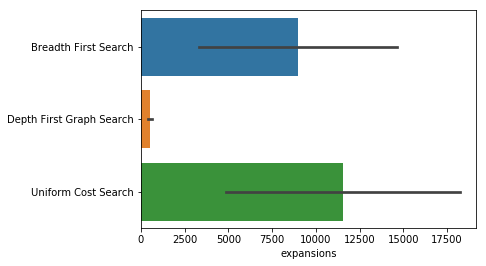

In [124]:
df=pd.concat([uninformed[p]['performance'] for p in range(1,3)])
utils.barh("expansions","algorithm", df)



##### Space complexity

Here we will consider the number of nodes created and the effective branching factor.

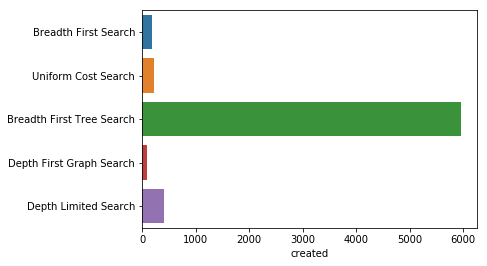

In [112]:
utils.barh("created","algorithm", df)

[Text(0,0.5,''),
 (0, 18000),
 Text(0.5,0,'Automobile collisions per billion miles')]

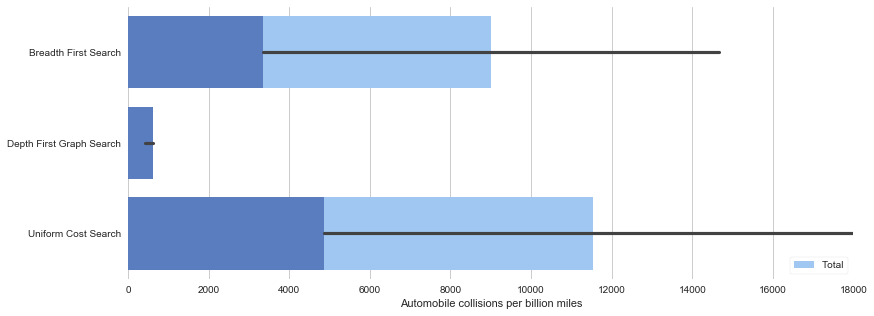

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 5))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="algorithm", x="expansions", data=df,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="algorithm", x="expansions", data=uninformed[1]['performance'],
            label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 18000), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

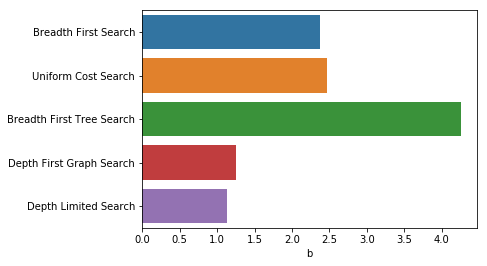

In [359]:
utils.barh("b","algorithm", df)

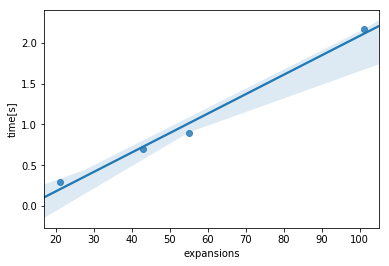

In [276]:
import matplotlib as plt
#df.plot.scatter('expansions','time[s]')
fig=sns.regplot(x="expansions", y="time[s]", data=df.drop('breadth_first_tree_search'))

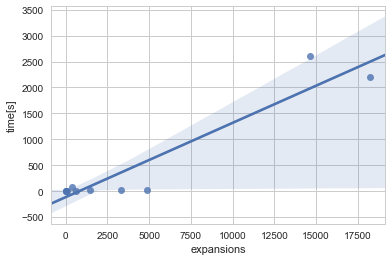

In [143]:
import matplotlib as plt

df=pd.concat([uninformed[p]['performance'] for p in range(0,3)])

#df.plot.scatter('expansions','time[s]')
fig=sns.regplot(x="expansions", y="time[s]", data=df.drop('breadth_first_tree_search'))

In [141]:
[uninformed[p]['performance'] for p in range(0,3)]

[                   algorithm  created  expansions heuristic  length  problem  \
 0       Breadth First Search      180          43                 6        1   
 1  Breadth First Tree Search     5960        1458                 6        1   
 2   Depth First Graph Search       84          21                20        1   
 3       Depth Limited Search      414         101                50        1   
 4        Uniform Cost Search      224          55                 6        1   
 
    tests  time[s]  optimal  algo  
 0     56      0.7     True   BFS  
 1   1459     23.9     True  BFTS  
 2     22      0.3    False  DFGS  
 3    271      2.2    False   DLS  
 4     57      0.9     True   UCS  ,
                   algorithm  created  expansions heuristic  length  problem  \
 0      Breadth First Search    30509        3343                 9        2   
 1  Depth First Graph Search     5602         624               619        2   
 2       Uniform Cost Search    44030        4852      

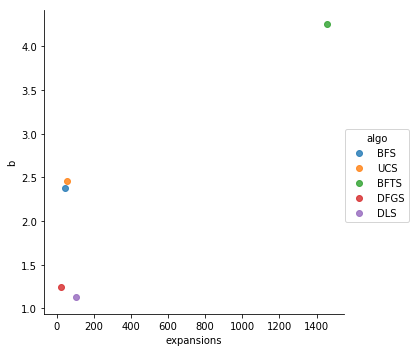

In [362]:
fig=sns.lmplot(x="expansions", y="b", data=df.reset_index(),fit_reg=False,hue='algo')

### Informed search algorithms

Next we have the *informed* search algorithms.

In [90]:
informed=dict()
informed['performance'],informed['solution']=utils.load_results('informed',2)
df=informed['performance'].sort_values(by=['length','expansions']).drop_duplicates()
df.set_index(['algorithm','algo','heuristic'])[['length','optimal']]

length  optimal
algorithm                  algo  heuristic                 
Astar Se                   AS    HPL             9     True
                                 HIP             9     True
                                 H1              9     True
Greedy Best First Graph Se GBFGS H1             17    False

In [91]:
df=informed['performance'].sort_values(by=['length','expansions']).drop(['problem'],axis=1).drop_duplicates()
df=df.assign(b = lambda x: x.created**(1/x.length))
df.set_index(['algo','heuristic']).drop('algorithm',axis=1)

created  expansions  length  tests  time[s]  optimal   b
algo  heuristic                                                          
AS    HPL            841          86       9     88     86.1     True 2.1
      HIP          13303        1450       9   1452      9.8     True 2.9
      H1           44030        4852       9   4854     29.5     True 3.3
GBFGS H1            8910         990      17    992      6.0    False 1.7

In [92]:
informed=dict()
informed['performance'],informed['solution']=utils.load_results('informed',3)
df=informed['performance'].sort_values(by=['length','expansions']).drop_duplicates()
df.set_index(['algorithm','algo','heuristic'])[['length','optimal']]

length  optimal
algorithm                  algo  heuristic                 
Astar Se                   AS    HIP            12     True
                                 H1             12     True
Greedy Best First Graph Se GBFGS H1             22    False

In [93]:
df=informed['performance'].sort_values(by=['length','expansions']).drop(['problem'],axis=1).drop_duplicates()
df=df.assign(b = lambda x: x.created**(1/x.length))
df.set_index(['algo','heuristic']).drop('algorithm',axis=1)

created  expansions  length  tests  time[s]  optimal   b
algo  heuristic                                                          
AS    HIP          44944        5040      12   5042    960.9     True 2.4
      H1          159716       18235      12  18237   3094.8     True 2.7
GBFGS H1           49429        5614      22   5616     47.5    False 1.6

In [23]:
df=informed['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,AS,GBFGS,RBFS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C2, P2, JFK)"
1,"Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Load(C1, P1, SFO)"
2,"Load(C2, P2, JFK)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)"
3,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)"
4,"Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Fly(P1, SFO, JFK)"
5,"Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Unload(C1, P1, JFK)"


In [3]:
row=list(uninformed['path'].iterrows())[0]
print(row[0])
g=draw_path(row[1].values[0])
g._repr_svg()

breadth_first_search


NameError: name 'draw_path' is not defined

In [ ]:
def draw_path(path,airports=['SFO','JFK']):
    import pydot
    g = pydot.Dot()    
    g.set_type('digraph')
    g.set_rankdir('LR')
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)

    for s in ['Eaten(Cake)', 'Have(Cake)']:
        g.add_node(pydot.Node(name=s,label=s,shape='doublecircle'))    

    ['darkorange','darkorchid','darksalmon','deepskyblue','deeppink']
    i=1
    for action in path[0:-1]:
        
        a,arg=action.split('(')
        arg1,arg2,arg3=arg.split(',')
        arg2=arg2.replace(' ','')
        arg3=arg3[0:-1].replace(' ','')
        if a=='Fly':
            p,f,t=arg1,arg2,arg3
            g.add_edge(pydot.Edge(f,t,label='{}: {} ({})'.format(i,a,p)))    
        else: 
            c,p,f=arg1,arg2,arg3
            if a=='Load':
                g.add_edge(pydot.Edge(f,f,color=color[0],label='{}: {} ({}=>{})'.format(i,a,c,p)))    
            else:
                g.add_edge(pydot.Edge(f,f,dir='back',label='{}: {} ({}=>{})'.format(i,a,p,c)))    

        i=i+1
    print(g.to_string())

In [58]:
import example_have_cake
from aimacode.search import Node
problem=example_have_cake.have_cake()
#print(dot_tree(p))
from my_air_cargo_problems import air_cargo_p2
problem=air_cargo_p2()

In [51]:
root = Node(problem.initial)    
flatten = lambda l: [item for sublist in l for item in sublist]
children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
nodes=set(children+grandchildren+greatgrandchildren)


In [59]:
print(dot_tree(problem))

digraph G {
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
TTTTTTFFFFFFFFFFFFFFFFFFFFF [shape=doublecircle, label=TTTTTTFFFFFFFFFFFFFFFFFFFFF];
TTTTFTFFFFFFFFFFFFFFFFFFTFF [label=TTTTFTFFFFFFFFFFFFFFFFFFTFF, penwidth=1];
TTTTTFFFFFFFFFFFFFFFFFFFFFT [label=TTTTTFFFFFFFFFFFFFFFFFFFFFT, penwidth=1];
TFTTTTFFFTFFFFFFFFFFFFFFFFF [label=TFTTTTFFFTFFFFFFFFFFFFFFFFF, penwidth=1];
FTTTTTFFFFFFFTFFFFFFFFFFFFF [label=FTTTTTFFFFFFFTFFFFFFFFFFFFF, penwidth=1];
TTTFTTFFFFFFFFFFFFFFFTFFFFF [label=TTTFTTFFFFFFFFFFFFFFFTFFFFF, penwidth=1];
TTTFTTFFFFFFFFFFFFFFFFTFFFF [label=TTTFTTFFFFFFFFFFFFFFFFTFFFF, penwidth=1];
TTTTTFFFFFFFFFFFFFFFFFFFFTF [label=TTTTTFFFFFFFFFFFFFFFFFFFFTF, penwidth=1];
TTFTTTFFFFFFFFFFFFFFTFFFFFF [label=TTFTTTFFFFFFFFFFFFFFTFFFFFF, penwidth=1];
TTTTFTFFFFFFFFFFFFFFFFFTFFF [label=TTTTFTFFFFFFFFFFFFFFFFFTFFF, penwidth=1];
TTTTTTFFFFFFFFFFFFFFFFFFFFF -> TTTTFTFFFFFFFFFFFFFFFFFFTFF  [label="Fly ((P2, JFK, ATL))"];
TTTTTTFFFFFFFFFFFFFFFFFFFFF -> TTTTTFFF

In [56]:
def dot_tree(problem):    
   
#pre : a Problem() as input    
#post: Dot graph in string format. Paste this in http://www.webgraphviz.com/ 
#usage: print(dot_tree(problem))  
    root = Node(problem.initial)    
    flatten = lambda l: [item for sublist in l for item in sublist]
    children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
    grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
    greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
    nodes=set(children)#+grandchildren+greatgrandchildren)
    import pydot    
    
#make a Dot graph of the nodes and connections    
#initial state as double circle     
#goal state is marked with thick lines    
#current implementation only goes two levels down (greatgrandchildren)    
            
    g = pydot.Dot()    
    g.set_type('digraph')    
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)        
    g.add_node(pydot.Node(name=root.state,label='{}'.format(root.state),shape='doublecircle'))    
    for n in nodes:        
        if problem.goal_test(n.state):            
            penwidth=3        
        else:            
            penwidth=1                
        g.add_node(pydot.Node(name=n.state,label='{}'.format(n.state),penwidth=penwidth))    
    for n in nodes:
        g.add_edge(pydot.Edge(n.parent.state,n.state,label='{} ({})'.format(n.action.name,n.action.args)))    
    return g.to_string()

In [33]:
import sys
sys.path.append('C:\Program Files (x86)\Graphviz2.38\bin')
sys.path.append('C:\Program Files (x86)\Graphviz2.38')
C:\Users\Administrator\Anaconda3\pkgs\graphviz-2.38.0-4\Library\bin\graphviz

from graphviz import Digraph
dot=Digraph(comment='test')
dot._repr_svg_()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [21]:
for row in uninformed['path'].iterrows():
    print(row[0])
    draw_path(row[1].values[0])

breadth_first_search
digraph G {
rankdir=LR;
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
SFO [shape=doublecircle, label=SFO];
JFK [shape=doublecircle, label=JFK];
SFO -> SFO  [arrowhead=diamond, label="1: Load (C1=>P1)"];
JFK -> JFK  [arrowhead=diamond, label="2: Load (C2=>P2)"];
JFK -> SFO  [label="3: Fly (P2)"];
SFO -> SFO  [arrowtail=odiamond, dir=back, label="4: Unload (P2=>C2)"];
SFO -> JFK  [label="5: Fly (P1)"];
JFK -> JFK  [arrowtail=odiamond, dir=back, label="6: Unload (P1=>C1)"];
}

breadth_first_tree_search
digraph G {
rankdir=LR;
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
SFO [shape=doublecircle, label=SFO];
JFK [shape=doublecircle, label=JFK];
SFO -> SFO  [arrowhead=diamond, label="1: Load (C1=>P1)"];
JFK -> JFK  [arrowhead=diamond, label="2: Load (C2=>P2)"];
JFK -> SFO  [label="3: Fly (P2)"];
SFO -> SFO  [arrowtail=odiamond, dir=back, label="4: Unload (P2=>C2)"];
SFO -> JFK  [label="5: Fly (P1)"];
JFK 

In [19]:
def draw_path(path,airports=['SFO','JFK']):
    import pydot
    g = pydot.Dot()    
    g.set_type('digraph')
    g.set_rankdir('LR')
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)

    for airport in airports:
        g.add_node(pydot.Node(name=airport,label=airport,shape='doublecircle'))    

    i=1
    for action in path[0:-1]:
        a,arg=action.split('(')
        arg1,arg2,arg3=arg.split(',')
        arg2=arg2.replace(' ','')
        arg3=arg3[0:-1].replace(' ','')
        if a=='Fly':
            p,f,t=arg1,arg2,arg3
            g.add_edge(pydot.Edge(f,t,label='{}: {} ({})'.format(i,a,p)))    
        else: 
            c,p,f=arg1,arg2,arg3
            if a=='Load':
                g.add_edge(pydot.Edge(f,f,arrowhead='diamond',label='{}: {} ({}=>{})'.format(i,a,c,p)))    
            else:
                g.add_edge(pydot.Edge(f,f,arrowtail='odiamond',dir='back',label='{}: {} ({}=>{})'.format(i,a,p,c)))    

        i=i+1
    print(g.to_string())
    

In [ ]:
def dot_tree(problem):    
   
#pre : a Problem() as input    
#post: Dot graph in string format. Paste this in http://www.webgraphviz.com/ 
#usage: print(dot_tree(problem))  
    root = Node(problem.initial)    
    flatten = lambda l: [item for sublist in l for item in sublist]
    children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
    grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
    greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
    nodes=set(children+grandchildren+greatgrandchildren)
    import pydot    
    
#make a Dot graph of the nodes and connections    
#initial state as double circle     
#goal state is marked with thick lines    
#current implementation only goes two levels down (greatgrandchildren)    
            
    g = pydot.Dot()    
    g.set_type('digraph')    
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)        
    g.add_node(pydot.Node(name=root.state,label='{}'.format(root.state),shape='doublecircle'))    
    for n in nodes:        
        if problem.goal_test(n.state):            
            penwidth=3        
        else:            
            penwidth=1                
        g.add_node(pydot.Node(name=n.state,label='{}'.format(n.state),penwidth=penwidth))    
    for n in nodes:
        g.add_edge(pydot.Edge(n.parent.state,n.state,label='{} ({})'.format(n.action.name,n.action.args)))    
   return g.to_string()

##### Informed Search Algorithms

In [132]:
informed=dict()
informed['performance'],informed['path']=load_results('informed',1)
informed['performance']

expansions  tests  created  \
algorithm                  heuristic                                            
recursive_best_first_se    h_1                           4229   4230    17023   
greedy_best_first_graph_se h_1                              7      9       28   
astar_se                   h_1                             55     57      224   
                           h_ignore_preconditions          41     43      170   
                           h_pg_levelsum                   11     13       50   

                                                   length   seconds  
algorithm                  heuristic                                 
recursive_best_first_se    h_1                          6  4.860465  
greedy_best_first_graph_se h_1                          6  0.009442  
astar_se                   h_1                          6  0.064447  
                           h_ignore_preconditions       6  0.060539  
                           h_pg_levelsum                6  1.497370

### Problem 2